In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
column_names = [f"X{i}" for i in range(1,34)]

In [3]:
train_df = pd.read_csv("train.csv", sep=",", names=column_names + ["Y"])
test_df = pd.read_csv("test.csv", sep=",", names=column_names)

In [4]:
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,Y
0,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.619,-0.536,-0.092,0.182,0.034,-0.172,0.401,0.393,0.216,1
1,V1,V1,V1,V1,V1,V1,V2,V1,V3,V5,...,0.352,0.073,-0.092,1.098,0.034,1.160,0.401,0.037,0.216,1
2,V1,V1,V1,V1,V1,V1,V1,V1,V2,V2,...,-1.933,-0.536,-0.092,1.098,0.034,0.716,0.401,0.724,0.216,-1
3,V1,V1,V1,V1,V1,V1,V1,V1,V2,V2,...,-0.762,-0.536,-0.092,1.098,0.034,0.716,0.401,0.712,0.216,-1
4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,...,-0.505,-0.536,-0.092,0.182,0.034,0.716,0.401,0.393,0.216,1


In [5]:
test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
0,V2,V1,V1,V1,V2,V1,V1,V1,V1,V4,...,-0.241,-0.162,-0.536,-0.092,0.182,2.751,-0.394,0.401,0.724,0.216
1,V2,V1,V1,V1,V2,V1,V1,V1,V1,V4,...,-0.636,0.895,-0.536,-0.092,1.098,1.393,-0.394,0.401,0.724,0.216
2,V2,V1,V1,V1,V2,V1,V1,V1,V4,V6,...,0.568,0.752,-0.536,-0.092,0.548,-0.782,0.050,0.401,0.018,0.216
3,V2,V1,V1,V1,V2,V1,V1,V1,V4,V6,...,-0.007,0.095,-0.536,-0.092,-1.651,-1.325,0.050,0.401,0.018,0.216
4,V2,V1,V1,V2,V2,V1,V1,V1,V1,V4,...,1.234,-0.305,-0.536,-0.092,-0.552,1.936,-0.394,0.401,0.018,0.216


In [6]:
one = sum([i for i in train_df["Y"] if i == 1])
minus_one = sum([i for i in train_df["Y"] if i == -1])
print("One:", one)
print("Minus one:", minus_one)

One: 163
Minus one: -237


# Numerical data analysis

In [7]:
train_df_categories = train_df.select_dtypes(include=['object']).copy()

In [8]:
train_df_categories.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1
1,V1,V1,V1,V1,V1,V1,V2,V1,V3,V5,V3,V2,V1,V2
2,V1,V1,V1,V1,V1,V1,V1,V1,V2,V2,V1,V2,V1,V1
3,V1,V1,V1,V1,V1,V1,V1,V1,V2,V2,V2,V2,V1,V2
4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1


In [9]:
print("Missing values:",train_df_categories.isnull().values.sum())

Missing values: 367


In [10]:
null_in_columns = train_df_categories.isnull().sum()
print("Missing values per columns",null_in_columns)

Missing values per columns X1      48
X2      49
X3      51
X4       0
X5       0
X6      24
X7      47
X8      16
X9       0
X10      0
X11      0
X12      0
X13    117
X14     15
dtype: int64


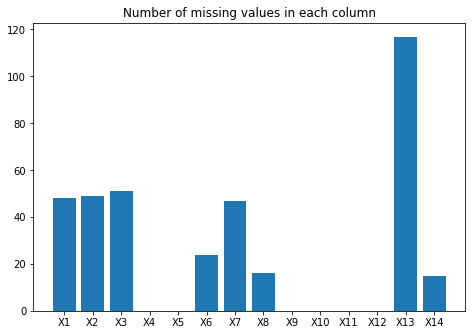

In [11]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(null_in_columns.index,null_in_columns.values)
plt.title("Number of missing values in each column")
plt.show()

In [12]:
train_df_categories['X1'].value_counts().index[0]

'V2'

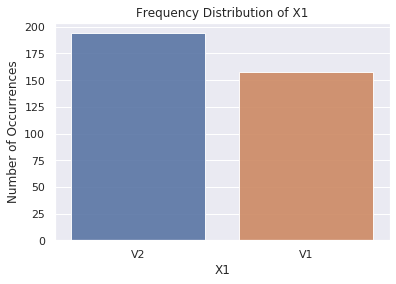

V2    194
V1    158
Name: X1, dtype: int64


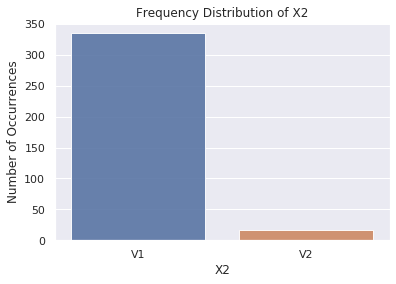

V1    335
V2     16
Name: X2, dtype: int64


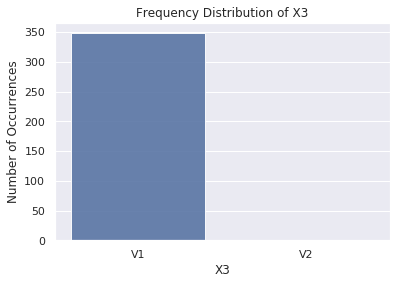

V1    348
V2      1
Name: X3, dtype: int64


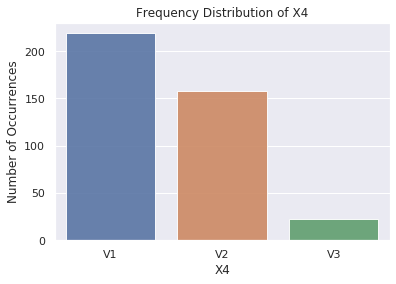

V1    219
V2    158
V3     23
Name: X4, dtype: int64


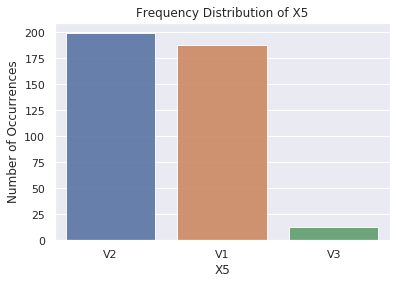

V2    199
V1    188
V3     13
Name: X5, dtype: int64


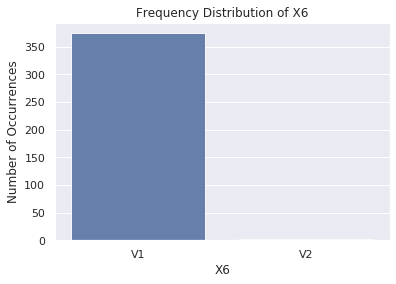

V1    374
V2      2
Name: X6, dtype: int64


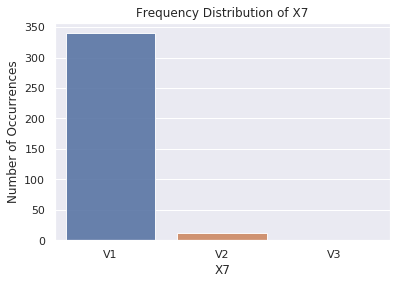

V1    340
V2     12
V3      1
Name: X7, dtype: int64


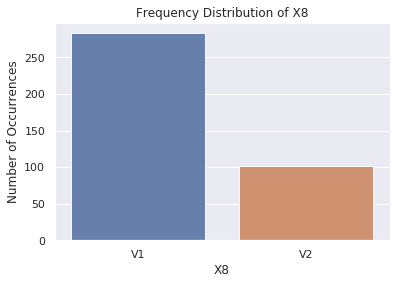

V1    283
V2    101
Name: X8, dtype: int64


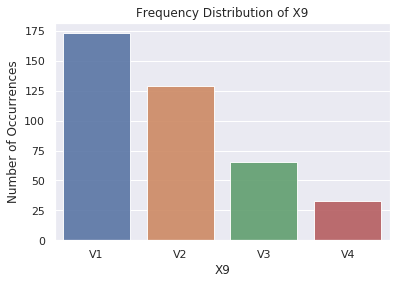

V1    173
V2    129
V3     65
V4     33
Name: X9, dtype: int64


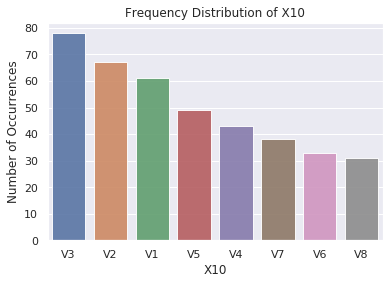

V3    78
V2    67
V1    61
V5    49
V4    43
V7    38
V6    33
V8    31
Name: X10, dtype: int64


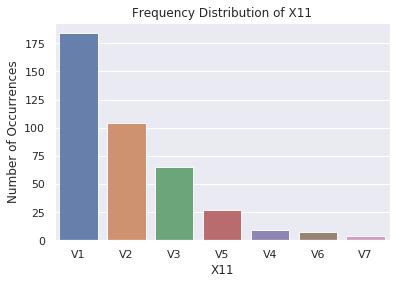

V1    184
V2    104
V3     65
V5     27
V4      9
V6      7
V7      4
Name: X11, dtype: int64


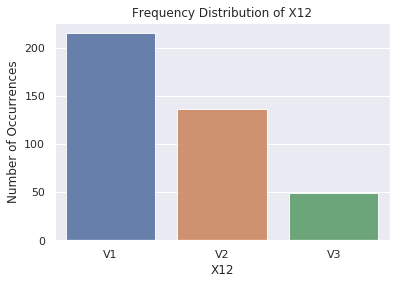

V1    215
V2    136
V3     49
Name: X12, dtype: int64


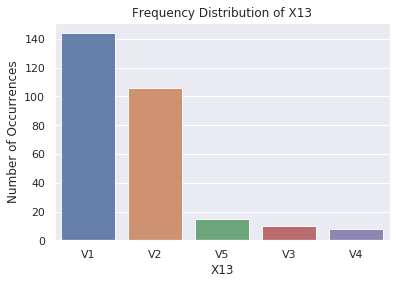

V1    144
V2    106
V5     15
V3     10
V4      8
Name: X13, dtype: int64


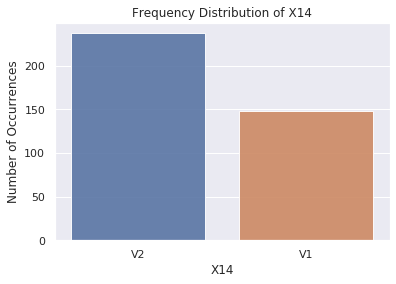

V2    237
V1    148
Name: X14, dtype: int64


In [13]:
for col in train_df_categories.columns:
    cat_dist = train_df_categories[col].value_counts()    
    sns.set(style="darkgrid")
    sns.barplot(cat_dist.index, cat_dist.values, alpha=0.9)
    plt.title(f'Frequency Distribution of {col}')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    print(cat_dist)

In [14]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data

    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot

    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count    400.000000
mean      -0.185000
std        0.983969
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        1.000000
Name: Y, dtype: float64
mode:  0   -1
dtype: int64
-1    237
 1    163
Name: Y, dtype: int64


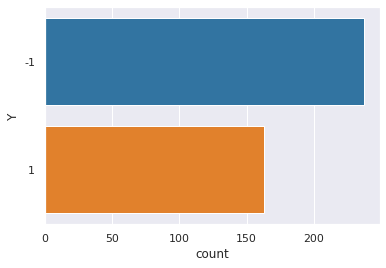

In [15]:
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(train_df, y = 'Y', palette=c_palette)

count     352
unique      2
top        V2
freq      194
Name: X1, dtype: object
mode:  0    V2
dtype: object
V2    194
V1    158
Name: X1, dtype: int64


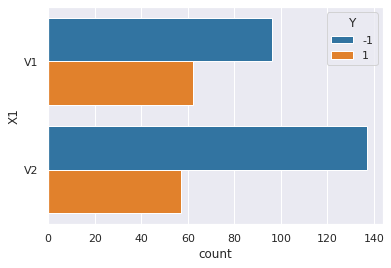

count     351
unique      2
top        V1
freq      335
Name: X2, dtype: object
mode:  0    V1
dtype: object
V1    335
V2     16
Name: X2, dtype: int64


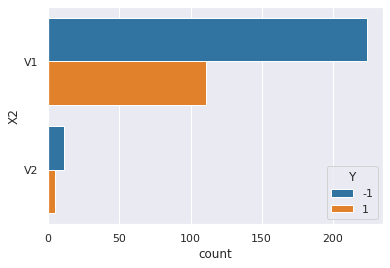

count     349
unique      2
top        V1
freq      348
Name: X3, dtype: object
mode:  0    V1
dtype: object
V1    348
V2      1
Name: X3, dtype: int64


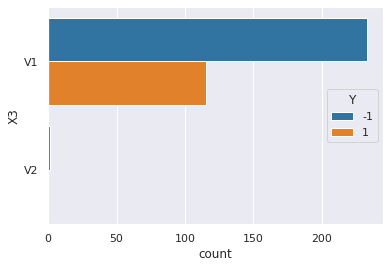

count     400
unique      3
top        V1
freq      219
Name: X4, dtype: object
mode:  0    V1
dtype: object
V1    219
V2    158
V3     23
Name: X4, dtype: int64


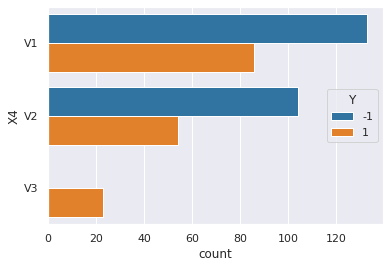

count     400
unique      3
top        V2
freq      199
Name: X5, dtype: object
mode:  0    V2
dtype: object
V2    199
V1    188
V3     13
Name: X5, dtype: int64


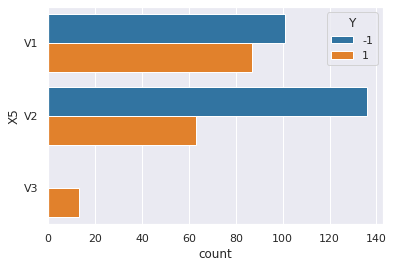

count     376
unique      2
top        V1
freq      374
Name: X6, dtype: object
mode:  0    V1
dtype: object
V1    374
V2      2
Name: X6, dtype: int64


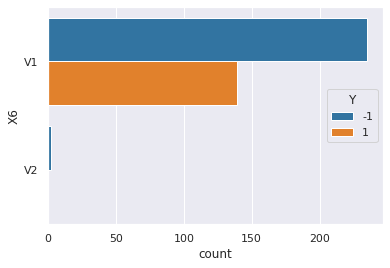

count     353
unique      3
top        V1
freq      340
Name: X7, dtype: object
mode:  0    V1
dtype: object
V1    340
V2     12
V3      1
Name: X7, dtype: int64


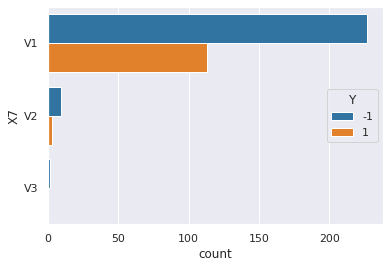

count     384
unique      2
top        V1
freq      283
Name: X8, dtype: object
mode:  0    V1
dtype: object
V1    283
V2    101
Name: X8, dtype: int64


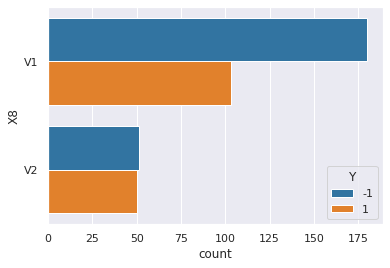

count     400
unique      4
top        V1
freq      173
Name: X9, dtype: object
mode:  0    V1
dtype: object
V1    173
V2    129
V3     65
V4     33
Name: X9, dtype: int64


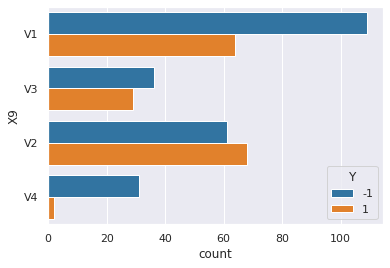

count     400
unique      8
top        V3
freq       78
Name: X10, dtype: object
mode:  0    V3
dtype: object
V3    78
V2    67
V1    61
V5    49
V4    43
V7    38
V6    33
V8    31
Name: X10, dtype: int64


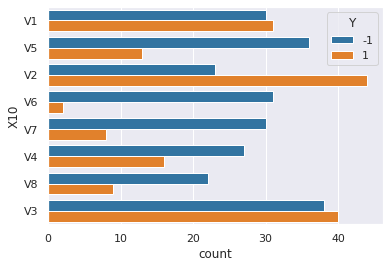

count     400
unique      7
top        V1
freq      184
Name: X11, dtype: object
mode:  0    V1
dtype: object
V1    184
V2    104
V3     65
V5     27
V4      9
V6      7
V7      4
Name: X11, dtype: int64


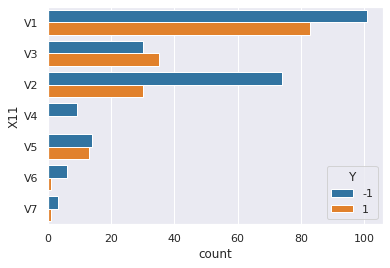

count     400
unique      3
top        V1
freq      215
Name: X12, dtype: object
mode:  0    V1
dtype: object
V1    215
V2    136
V3     49
Name: X12, dtype: int64


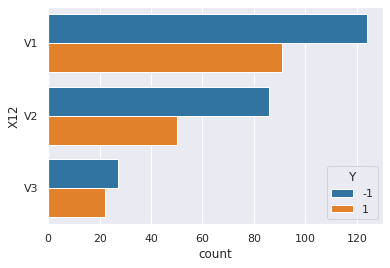

count     283
unique      5
top        V1
freq      144
Name: X13, dtype: object
mode:  0    V1
dtype: object
V1    144
V2    106
V5     15
V3     10
V4      8
Name: X13, dtype: int64


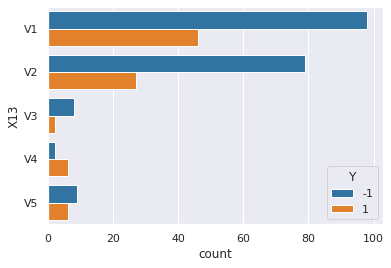

count     385
unique      2
top        V2
freq      237
Name: X14, dtype: object
mode:  0    V2
dtype: object
V2    237
V1    148
Name: X14, dtype: int64


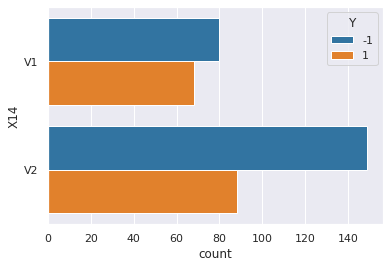

In [16]:
for col in train_df_categories.columns:
    categorical_summarized(train_df, y = col, hue='Y', palette=c_palette)

In [17]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data

    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed

    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

In [18]:
train_df_quant = train_df.select_dtypes(include=['float']).copy()
train_df_quant.columns

Index(['X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24',
       'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33'],
      dtype='object')

count    349.000000
mean       0.038885
std        1.065642
min       -2.215000
25%       -0.557000
50%       -0.004000
75%        0.549000
max        3.037000
Name: X15, dtype: float64
mode:  0   -0.557
dtype: float64


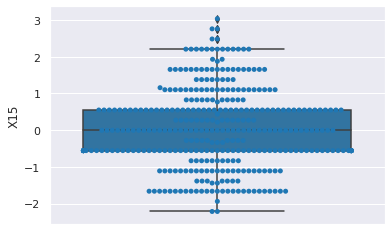

In [19]:
quantitative_summarized(dataframe= train_df, y = train_df_quant.columns[0], palette=c_palette, verbose=False, swarm=True)

count    349.000000
mean       0.038885
std        1.065642
min       -2.215000
25%       -0.557000
50%       -0.004000
75%        0.549000
max        3.037000
Name: X15, dtype: float64
mode:  0   -0.557
dtype: float64


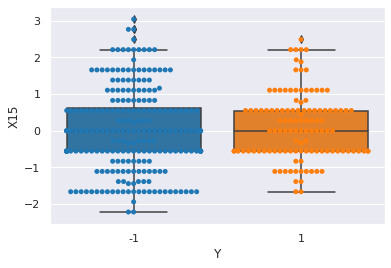

In [20]:
quantitative_summarized(dataframe= train_df, y = train_df_quant.columns[0], x = 'Y', palette=c_palette, verbose=False, swarm=True)

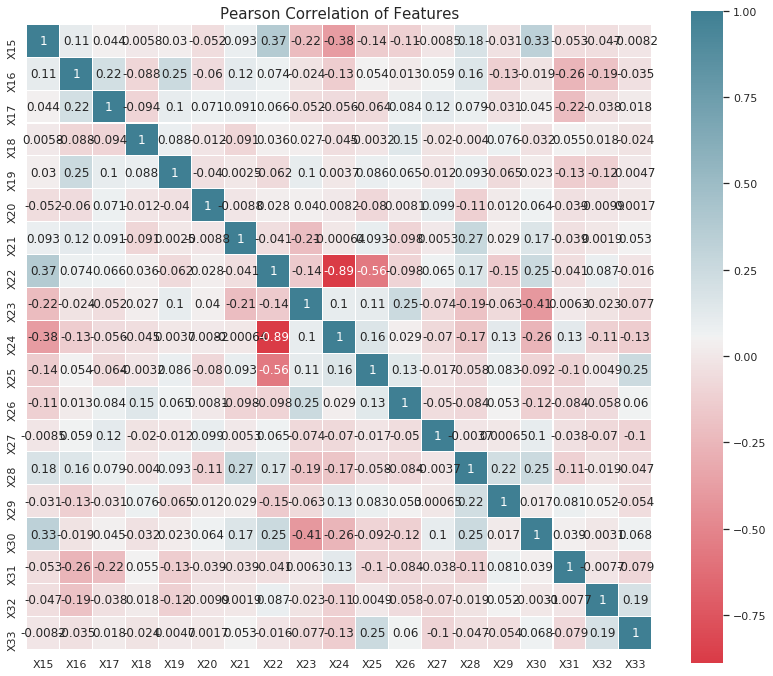

In [21]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(train_df_quant.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

# Encode categorical data

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_tmp = train_df_categories
df_tmp.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
395,NaN,NaN,NaN,V3,V1,NaN,NaN,NaN,V1,V4,V2,V1,NaN,V2
396,NaN,NaN,NaN,V3,V2,NaN,NaN,V1,V3,V2,V5,V1,NaN,V2
397,NaN,NaN,NaN,V3,V2,NaN,NaN,NaN,V1,V4,V1,V1,NaN,V2
398,NaN,NaN,NaN,V3,V1,NaN,NaN,NaN,V1,V8,V1,V1,NaN,V2
399,NaN,NaN,NaN,V3,V1,NaN,NaN,V1,V3,V2,V5,V1,NaN,V2


## Fill NaN (option 1), by replacing with new class

In [23]:
df_tmp_unknown = df_tmp.fillna("Unknown")
df_tmp_unknown.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
395,Unknown,Unknown,Unknown,V3,V1,Unknown,Unknown,Unknown,V1,V4,V2,V1,Unknown,V2
396,Unknown,Unknown,Unknown,V3,V2,Unknown,Unknown,V1,V3,V2,V5,V1,Unknown,V2
397,Unknown,Unknown,Unknown,V3,V2,Unknown,Unknown,Unknown,V1,V4,V1,V1,Unknown,V2
398,Unknown,Unknown,Unknown,V3,V1,Unknown,Unknown,Unknown,V1,V8,V1,V1,Unknown,V2
399,Unknown,Unknown,Unknown,V3,V1,Unknown,Unknown,V1,V3,V2,V5,V1,Unknown,V2


## Fill NaN (option 2), by replacing with most occurring class

In [24]:
df_tmp_most = df_tmp.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_tmp_most.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
395,V2,V1,V1,V3,V1,V1,V1,V1,V1,V4,V2,V1,V1,V2
396,V2,V1,V1,V3,V2,V1,V1,V1,V3,V2,V5,V1,V1,V2
397,V2,V1,V1,V3,V2,V1,V1,V1,V1,V4,V1,V1,V1,V2
398,V2,V1,V1,V3,V1,V1,V1,V1,V1,V8,V1,V1,V1,V2
399,V2,V1,V1,V3,V1,V1,V1,V1,V3,V2,V5,V1,V1,V2


## Fill NaN (option 3), by replacing with most frequent one in that column

In [25]:
from sklearn.impute import SimpleImputer

simp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_tmp_frequent = simp.fit_transform(df_tmp)
df_tmp_frequent = pd.DataFrame(df_tmp_frequent, columns=train_df_categories.columns)
df_tmp_frequent.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
395,V2,V1,V1,V3,V1,V1,V1,V1,V1,V4,V2,V1,V1,V2
396,V2,V1,V1,V3,V2,V1,V1,V1,V3,V2,V5,V1,V1,V2
397,V2,V1,V1,V3,V2,V1,V1,V1,V1,V4,V1,V1,V1,V2
398,V2,V1,V1,V3,V1,V1,V1,V1,V1,V8,V1,V1,V1,V2
399,V2,V1,V1,V3,V1,V1,V1,V1,V3,V2,V5,V1,V1,V2


## Choose Fill Nan option

In [26]:
fill_nan = 1
if fill_nan == 0:
    df_fill_nan = df_tmp_unknown
elif fill_nan == 1:
    df_fill_nan = df_tmp_most
else:
    df_fill_nan = df_tmp_frequent
df_fill_nan.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
395,V2,V1,V1,V3,V1,V1,V1,V1,V1,V4,V2,V1,V1,V2
396,V2,V1,V1,V3,V2,V1,V1,V1,V3,V2,V5,V1,V1,V2
397,V2,V1,V1,V3,V2,V1,V1,V1,V1,V4,V1,V1,V1,V2
398,V2,V1,V1,V3,V1,V1,V1,V1,V1,V8,V1,V1,V1,V2
399,V2,V1,V1,V3,V1,V1,V1,V1,V3,V2,V5,V1,V1,V2


## One-hot encode

In [27]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), df_fill_nan.columns)], remainder='passthrough')
columnTransformer_fit = columnTransformer.fit(df_fill_nan)
df_cat_encoded = columnTransformer_fit.transform(df_fill_nan)
df_cat_encoded = pd.DataFrame.sparse.from_spmatrix(df_cat_encoded)
df_cat_encoded.tail()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
395,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
399,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Encode numerical values

In [28]:
df_nums = train_df.select_dtypes(include=['float']).copy()
df_nums.tail()

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
395,NaN,0.130,NaN,2.066,0.447,1.425,-0.648,NaN,0.172,NaN,NaN,NaN,NaN,-2.568,0.034,NaN,0.401,1.890,0.216
396,NaN,NaN,-1.092,0.579,-0.328,-1.159,0.339,NaN,0.842,NaN,NaN,NaN,NaN,-4.401,-2.684,NaN,0.401,1.391,0.216
397,NaN,NaN,0.348,0.892,-1.104,1.425,0.339,NaN,0.242,NaN,NaN,NaN,NaN,0.548,4.926,NaN,0.401,0.992,0.216
398,NaN,-0.614,-0.127,0.814,-0.328,1.425,0.339,NaN,0.242,NaN,NaN,NaN,NaN,-1.651,3.567,NaN,0.401,0.992,0.216
399,NaN,-0.614,-1.092,-0.908,-0.458,0.133,-0.648,NaN,0.689,NaN,NaN,NaN,NaN,0.182,0.034,NaN,0.401,1.012,0.216


## Fill NaN (option 1), by replacing with mean

In [29]:
simp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df_nums)
df_num_mean = simp_mean.transform(df_nums)
df_num_mean = pd.DataFrame(df_num_mean, columns=df_nums.columns)
df_num_mean.tail()

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
395,0.038885,0.130000,0.004408,2.066,0.447,1.425,-0.648,0.04525,0.172,-0.028099,-0.033622,0.016197,0.006873,-2.568,0.034,0.024822,0.401,1.890,0.216
396,0.038885,-0.188914,-1.092000,0.579,-0.328,-1.159,0.339,0.04525,0.842,-0.028099,-0.033622,0.016197,0.006873,-4.401,-2.684,0.024822,0.401,1.391,0.216
397,0.038885,-0.188914,0.348000,0.892,-1.104,1.425,0.339,0.04525,0.242,-0.028099,-0.033622,0.016197,0.006873,0.548,4.926,0.024822,0.401,0.992,0.216
398,0.038885,-0.614000,-0.127000,0.814,-0.328,1.425,0.339,0.04525,0.242,-0.028099,-0.033622,0.016197,0.006873,-1.651,3.567,0.024822,0.401,0.992,0.216
399,0.038885,-0.614000,-1.092000,-0.908,-0.458,0.133,-0.648,0.04525,0.689,-0.028099,-0.033622,0.016197,0.006873,0.182,0.034,0.024822,0.401,1.012,0.216


## Fill NaN (option 2), by replacing with median

In [30]:
simp_mean = SimpleImputer(missing_values=np.nan, strategy='median').fit(df_nums)
df_num_median = simp_mean.transform(df_nums)
df_num_median = pd.DataFrame(df_num_median, columns=df_nums.columns)
df_num_median.tail()

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
395,-0.004,0.130,-0.127,2.066,0.447,1.425,-0.648,-0.348,0.172,0.209,-0.0905,-0.536,-0.092,-2.568,0.034,-0.172,0.401,1.890,0.216
396,-0.004,-0.242,-1.092,0.579,-0.328,-1.159,0.339,-0.348,0.842,0.209,-0.0905,-0.536,-0.092,-4.401,-2.684,-0.172,0.401,1.391,0.216
397,-0.004,-0.242,0.348,0.892,-1.104,1.425,0.339,-0.348,0.242,0.209,-0.0905,-0.536,-0.092,0.548,4.926,-0.172,0.401,0.992,0.216
398,-0.004,-0.614,-0.127,0.814,-0.328,1.425,0.339,-0.348,0.242,0.209,-0.0905,-0.536,-0.092,-1.651,3.567,-0.172,0.401,0.992,0.216
399,-0.004,-0.614,-1.092,-0.908,-0.458,0.133,-0.648,-0.348,0.689,0.209,-0.0905,-0.536,-0.092,0.182,0.034,-0.172,0.401,1.012,0.216


## Fill NaN (option 3), by replacing with mice

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice = IterativeImputer(missing_values=np.nan, max_iter=100, random_state=0).fit(df_nums)
df_num_mice = mice.transform(df_nums)
df_num_mice = pd.DataFrame(df_num_mice, columns=df_nums.columns)
df_num_mice.tail()

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
395,-0.405245,0.130000,-0.136919,2.066,0.447,1.425,-0.648,-0.167328,0.172,0.075445,0.110927,0.315349,-0.022056,-2.568,0.034,-0.533295,0.401,1.890,0.216
396,-0.603788,-0.646468,-1.092000,0.579,-0.328,-1.159,0.339,-0.472883,0.842,0.315290,0.419700,0.151720,-0.128521,-4.401,-2.684,-1.116946,0.401,1.391,0.216
397,-0.368573,-0.955195,0.348000,0.892,-1.104,1.425,0.339,-0.794713,0.242,0.675702,0.394196,0.325006,-0.004386,0.548,4.926,-0.048752,0.401,0.992,0.216
398,-0.563669,-0.614000,-0.127000,0.814,-0.328,1.425,0.339,-1.075991,0.242,0.882458,0.584366,0.342882,-0.023192,-1.651,3.567,-0.413558,0.401,0.992,0.216
399,-0.168189,-0.614000,-1.092000,-0.908,-0.458,0.133,-0.648,0.084308,0.689,-0.090424,0.000836,-0.043595,-0.065111,0.182,0.034,-0.205078,0.401,1.012,0.216


## Choose Fill Nan option

In [32]:
fill_nan = 0
if fill_nan == 0:
    df_fill_nan_num = df_num_mean
elif fill_nan == 1:
    df_fill_nan_num = df_num_median
else:
    df_fill_nan_num = df_num_mice
df_fill_nan_num.tail()

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
395,0.038885,0.130000,0.004408,2.066,0.447,1.425,-0.648,0.04525,0.172,-0.028099,-0.033622,0.016197,0.006873,-2.568,0.034,0.024822,0.401,1.890,0.216
396,0.038885,-0.188914,-1.092000,0.579,-0.328,-1.159,0.339,0.04525,0.842,-0.028099,-0.033622,0.016197,0.006873,-4.401,-2.684,0.024822,0.401,1.391,0.216
397,0.038885,-0.188914,0.348000,0.892,-1.104,1.425,0.339,0.04525,0.242,-0.028099,-0.033622,0.016197,0.006873,0.548,4.926,0.024822,0.401,0.992,0.216
398,0.038885,-0.614000,-0.127000,0.814,-0.328,1.425,0.339,0.04525,0.242,-0.028099,-0.033622,0.016197,0.006873,-1.651,3.567,0.024822,0.401,0.992,0.216
399,0.038885,-0.614000,-1.092000,-0.908,-0.458,0.133,-0.648,0.04525,0.689,-0.028099,-0.033622,0.016197,0.006873,0.182,0.034,0.024822,0.401,1.012,0.216


## Normalize continous values (?)

# Combine data

In [33]:
df_combined = df_fill_nan_num.copy()
for col in df_cat_encoded.columns:
    df_combined[col] = df_cat_encoded[col]
df_combined

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,...,38,39,40,41,42,43,44,45,46,47
0,1.102000,-0.614000,-1.092000,1.283,-0.070,0.133,-1.196,1.06900,-0.375,-0.924000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.549000,-0.738000,1.312000,-2.629,-1.104,0.133,3.189,-0.84400,-0.527,0.820000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.207000,-0.986000,0.823000,0.501,-0.458,1.425,0.120,2.47200,-0.223,-1.823000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.207000,-0.986000,-1.092000,0.501,-1.363,0.133,-0.099,1.42000,-0.223,-1.284000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.549000,-0.118000,1.312000,-1.064,0.189,0.133,0.997,0.68900,-0.375,-0.546000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.038885,0.130000,0.004408,2.066,0.447,1.425,-0.648,0.04525,0.172,-0.028099,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.038885,-0.188914,-1.092000,0.579,-0.328,-1.159,0.339,0.04525,0.842,-0.028099,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.038885,-0.188914,0.348000,0.892,-1.104,1.425,0.339,0.04525,0.242,-0.028099,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.038885,-0.614000,-0.127000,0.814,-0.328,1.425,0.339,0.04525,0.242,-0.028099,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X = df_combined
y = train_df["Y"]

# Train

In [35]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [36]:
test_size = 0.2

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [95]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=100)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [90]:
print("Accuracy:", scores["test_accuracy"].mean())

Accuracy: 0.834375


In [100]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [106]:
rf = RandomForestClassifier()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 2)# Fit the random search model
rf_random.fit(X_train, y_train,)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   25.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [107]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [121]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4250 degrees.
Accuracy = 77.50%.


In [122]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.3750 degrees.
Accuracy = 87.50%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [94]:
sssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

NameError: name 'sssssssssssssssssssssssssssssssssssssssssssssssssssssssssss' is not defined

In [38]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [39]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [40]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [41]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [42]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [43]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [44]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [45]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [46]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.191331,0.034758,0.843750,0.880866,0.810040,0.833180,0.917778
2,Support Vector Machine,0.071772,0.015849,0.831250,0.841151,0.810873,0.824668,0.891944
3,Linear Discriminant Analysis,0.039550,0.021120,0.825000,0.823246,0.814563,0.823010,0.891746
0,Logistic Regression,0.061313,0.020151,0.818750,0.821776,0.800754,0.814736,0.877381
6,K-Nearest Neighbors,0.024454,0.023308,0.775000,0.778791,0.761786,0.770484,0.833790
1,Decision Tree,0.025766,0.014686,0.750000,0.750528,0.736905,0.747836,0.736905
4,Quadratic Discriminant Analysis,0.040817,0.023519,0.684375,0.692662,0.682103,0.666029,0.803016
7,Bayes,0.023241,0.015065,0.490625,0.586437,0.564286,0.414210,0.716964


## Voting

In [47]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [49]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

In [50]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [51]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling_hard,0.8,0.827586,0.685714,0.750000,not applicable
1,Ensembling_soft,0.8,0.756757,0.800000,0.777778,0.888254


## Linear SVC + SelectFromModel

In [52]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
X_svc.shape #reduction from 30 to 10 features

(400, 31)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_svc,y,test_size=test_size)

In [54]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [55]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [56]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [57]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [58]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [59]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [60]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [61]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [62]:
models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.165522,0.024832,0.831250,0.846383,0.817024,0.826095,0.909762
2,Support Vector Machine,0.033085,0.005297,0.821875,0.836981,0.807540,0.817295,0.873452
0,Logistic Regression,0.021608,0.006470,0.781250,0.792790,0.773532,0.777778,0.838333
3,Linear Discriminant Analysis,0.004678,0.006268,0.778125,0.791909,0.768889,0.774867,0.845437
6,K-Nearest Neighbors,0.001371,0.007517,0.778125,0.793573,0.770437,0.772235,0.837183
1,Decision Tree,0.002906,0.005044,0.756250,0.769817,0.748810,0.751744,0.748810
7,Bayes,0.001353,0.005479,0.700000,0.773804,0.656825,0.658009,0.812460
4,Quadratic Discriminant Analysis,0.002139,0.005374,0.653125,0.680937,0.601190,0.582741,0.800754


## Linear SVC + RFECV

In [63]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=20).fit(X,y)
X_rfecv = model.transform(X)
X_rfecv.shape #reduction from 30

(400, 23)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_rfecv,y,test_size=test_size)

In [65]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [66]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [67]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [68]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [69]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [70]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [71]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [72]:
models_rfecv = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_rfecv.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.166950,0.025310,0.803125,0.825972,0.779206,0.792324,0.876310
3,Linear Discriminant Analysis,0.002732,0.005206,0.781250,0.782847,0.768889,0.776688,0.853849
2,Support Vector Machine,0.027433,0.005799,0.765625,0.793273,0.737262,0.751195,0.843294
0,Logistic Regression,0.012065,0.005445,0.762500,0.767464,0.746190,0.757558,0.857857
1,Decision Tree,0.002283,0.005343,0.740625,0.741145,0.734286,0.737799,0.734286
6,K-Nearest Neighbors,0.001178,0.007487,0.728125,0.739016,0.711349,0.718773,0.785337
7,Bayes,0.001265,0.005392,0.659375,0.717827,0.584524,0.570830,0.811389
4,Quadratic Discriminant Analysis,0.002139,0.005374,0.653125,0.680937,0.601190,0.582741,0.800754


## Tree-based feature selection

In [73]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
etc = ExtraTreesClassifier()
etc.fit(X, y)

model = SelectFromModel(etc, prefit=True)
X_etc = model.transform(X)
X_etc.shape 

(400, 33)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [75]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [76]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [77]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [78]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [79]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [80]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [81]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [82]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [83]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_tree.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.206927,0.037385,0.821875,0.853280,0.794325,0.809507,0.915655
2,Support Vector Machine,0.074386,0.015745,0.778125,0.793375,0.754405,0.769820,0.846706
6,K-Nearest Neighbors,0.023410,0.018261,0.771875,0.777456,0.761587,0.768651,0.831448
0,Logistic Regression,0.071171,0.019818,0.765625,0.769487,0.745913,0.758072,0.828810
4,Quadratic Discriminant Analysis,0.052016,0.024781,0.737500,0.749384,0.711587,0.725760,0.801032
3,Linear Discriminant Analysis,0.037913,0.020792,0.734375,0.734869,0.715317,0.727905,0.833968
1,Decision Tree,0.025925,0.014717,0.725000,0.722781,0.715794,0.720085,0.715794
7,Bayes,0.023184,0.015190,0.503125,0.628588,0.573413,0.437314,0.754702


In [84]:
model_general = pd.concat([models_initial['Model'], models_initial['Accuracy'], 
                          
                          models_sfm['Model'], models_sfm['Accuracy'],
                          models_rfecv['Model'], models_rfecv['Accuracy'],
                          models_tree['Model'], models_tree['Accuracy'],
                          models_ensembling['Model'], models_ensembling['Accuracy']]
                          , axis=1)

model_general.columns = ['W/out reduction', 'Accuracy',
                        'Linear+SFM', 'Accuracy_sfm', 'Linear+RFECV', 'Accuracy_RFECV', 'Extra trees',
                         'Accuracy_trees', 'Voting', 'Accuracy_voting']

model_general.sort_values(by='Accuracy', ascending=False)

,W/out reduction,Accuracy,Linear+SFM,Accuracy_sfm,Linear+RFECV,Accuracy_RFECV,Extra trees,Accuracy_trees,Voting,Accuracy_voting
5,Random Forest,0.843750,Random Forest,0.831250,Random Forest,0.803125,Random Forest,0.821875,NaN,NaN
2,Support Vector Machine,0.831250,Support Vector Machine,0.821875,Support Vector Machine,0.765625,Support Vector Machine,0.778125,NaN,NaN
3,Linear Discriminant Analysis,0.825000,Linear Discriminant Analysis,0.778125,Linear Discriminant Analysis,0.781250,Linear Discriminant Analysis,0.734375,NaN,NaN
0,Logistic Regression,0.818750,Logistic Regression,0.781250,Logistic Regression,0.762500,Logistic Regression,0.765625,Ensebling_hard,0.8
6,K-Nearest Neighbors,0.775000,K-Nearest Neighbors,0.778125,K-Nearest Neighbors,0.728125,K-Nearest Neighbors,0.771875,NaN,NaN
1,Decision Tree,0.750000,Decision Tree,0.756250,Decision Tree,0.740625,Decision Tree,0.725000,Ensembling_soft,0.8
4,Quadratic Discriminant Analysis,0.684375,Quadratic Discriminant Analysis,0.653125,Quadratic Discriminant Analysis,0.653125,Quadratic Discriminant Analysis,0.737500,NaN,NaN
7,Bayes,0.490625,Bayes,0.700000,Bayes,0.659375,Bayes,0.503125,NaN,NaN


In [85]:
# df_tmp_unknown, df_num_mean
# Random Forest -  Accuracy_trees: 0.818132
# Random Forest -  Accuracy_RFECV: 0.842033
# Random Forest -  Accuracy: 0.810714

# df_tmp_most, df_num_mean
# Random Forest -  Accuracy: 0.843750
# Random Forest -  Accuracy_trees: 0.825000
# Random Forest -  Accuracy: 0.828125

# df_tmp_unknown, df_num_median
# Random Forest -  Accuracy_RFECV: 0.831250
# Random Forest -  Accuracy_trees: 0.834375
# Random Forest -  Accuracy_trees: 0.828125

# df_tmp_unknown, df_num_mice
# Random Forest -  Accuracy_RFECV: 0.821875
# Random Forest -  Accuracy: 0.806250
# Linear Discriminant Analysis - Accuracy_sfm: 0.81250

# df_tmp_most, df_num_median
# Support Vector Machine - 0.806250
# Random Forest -  Accuracy_RFECV: 0.840625
# Random Forest -  Accuracy_trees: 0.815625

# df_tmp_most, df_num_mice
# Random Forest -  Accuracy: 0.812500
# Random Forest -  Accuracy: 0.825000
# Random Forest -  Accuracy: 0.834375


# Winners
# df_tmp_most, df_num_mean
# Random Forest -  Accuracy_RFECV: 0.850000
# Random Forest -  Accuracy: 0.840625
# Random Forest -  Accuracy: 0.843750